# **US Baby Names 1880 - 2010**

*Chú thích: Nên chạy notebook theo thứ tự để tránh phát sinh lỗi không mong muốn*

Tổng quan:

Người dùng có thể truy cập dữ liệu này thông qua đường liên kết đến github: https://github.com/wesm/pydata-book

**Clone dataset từ github: https://github.com/wesm/pydata-book**

In [1]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 558 (delta 24), reused 7 (delta 4), pack-reused 525 (from 1)
Receiving objects: 100% (558/558), 63.76 MiB | 12.69 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Updating files: 100% (209/209), done.


## 1. TRUY CẬP DỮ LIỆU

**Import thư viện**

In [2]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

**Get dataset**

In [3]:
names1880 = pd.read_csv('/content/pydata-book/datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])

names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


## 2. KHAI PHÁ VÀ PHÂN TÍCH DỮ LIỆU

**Group names1880 by sex and birth**

In [5]:
names1880.groupby('sex').births.sum()

,births
sex,
F,90993
M,110493


- Since all of data is seperate by years, so we need to assemble all of the data into a single DataFrame and further add a year field using **pandas.concat**

**Assembling to a single DataFrame**

In [6]:
pieces = []

for year in range(1880, 2011):
  path = f'/content/pydata-book/datasets/babynames/yob{year}.txt'
  frame = pd.read_csv(path, names=['name', 'sex', 'births'])

  # add a column for the year
  frame['year'] = year
  pieces.append(frame)

# concatnate into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


- Tổng hợp dữ liệu trên mức độ năm với giới tính sử dụng **groupy** hoặc **pivot_table**

In [7]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

total_births.tail()

/tmp/ipython-input-3732149099.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)


sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

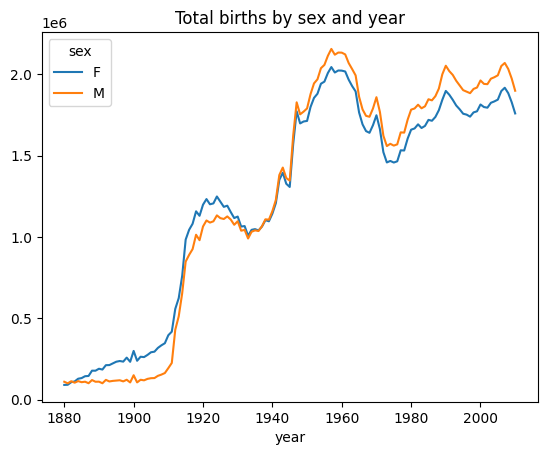

In [8]:
# visualize

total_births.plot(title='Total births by sex and year')

- Thêm cột prop chỉ định số lượng trẻ em có tên giống nhau trên tổng dữ liệu (prop = 0.02 tương ứng với có 2 trẻ có tên giống nhau trên tổng số 100 trẻ em).

**Phân tích số trẻ em có tên giống nhau**

In [9]:
# add prop column

def add_prop(group):
  group["prop"] = group["births"] / group["births"].sum()
  return group

names = names.groupby(["year", "sex"]).apply(add_prop).reset_index(drop=True)

/tmp/ipython-input-29823750.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop).reset_index(drop=True)


In [10]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [11]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

**Top 1000 names cho từng bộ giới tính/năm**

In [12]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000.head()

/tmp/ipython-input-1786717715.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

**Drop the index group**

In [13]:
top1000 = top1000.reset_index(drop=True)

top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


## 3. PHÂN TÍCH XU HƯỚNG ĐẶT TÊN

**Tách Top1000 thành 2 phần Nam và Nữ**

In [14]:
boys = top1000[top1000["sex"] == "M"]

girls = top1000[top1000["sex"] == "F"]

**Tạo bảng pivot với tổng số ngày sinh phân loại bởi năm và tên**

In [15]:
total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)

total_births.info()

/tmp/ipython-input-2100456573.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6849 entries, Aaden to Zuri
dtypes: float64(6849)
memory usage: 6.8 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

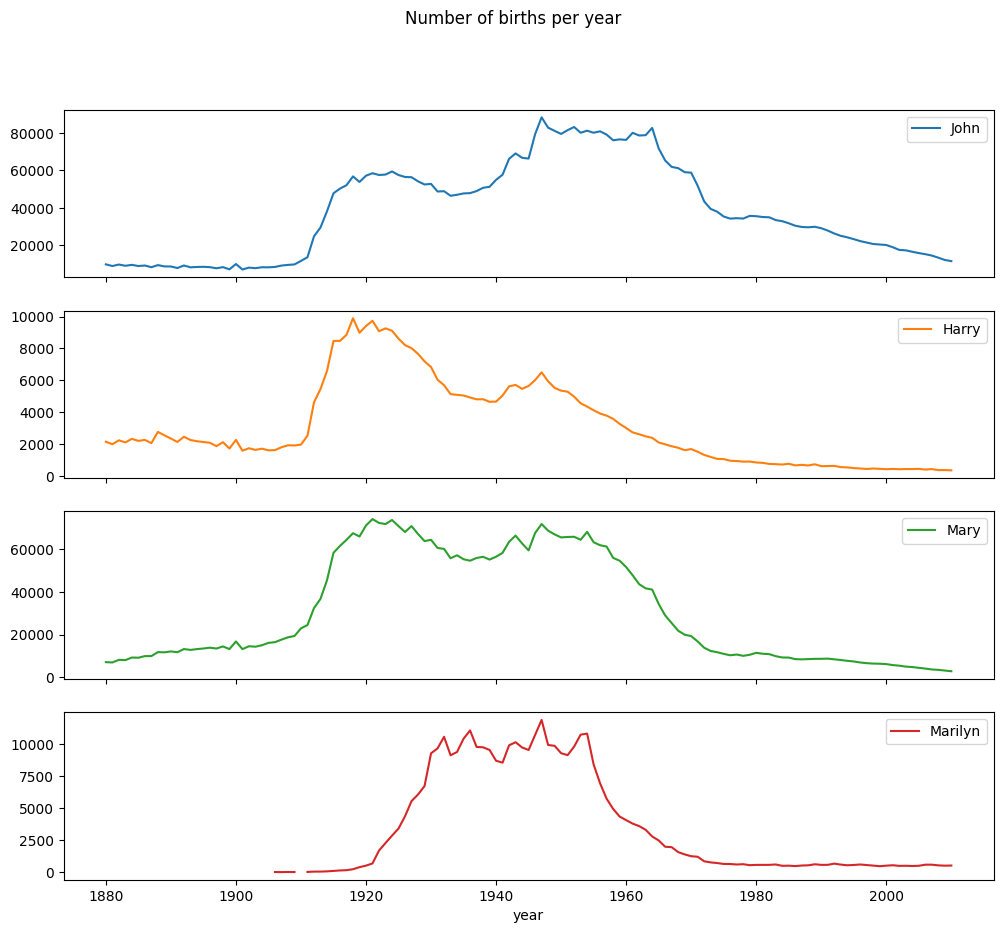

In [16]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

- Tại đây ta có thể thấy xu hướng đặt tên thông thường đã giảm theo năm đối với dân số Hoa Kỳ

**Đo lường độ tăng của sự đa dạng về Tên**

- Bảng độ giảm của những tên thông dụng

/tmp/ipython-input-15274197.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

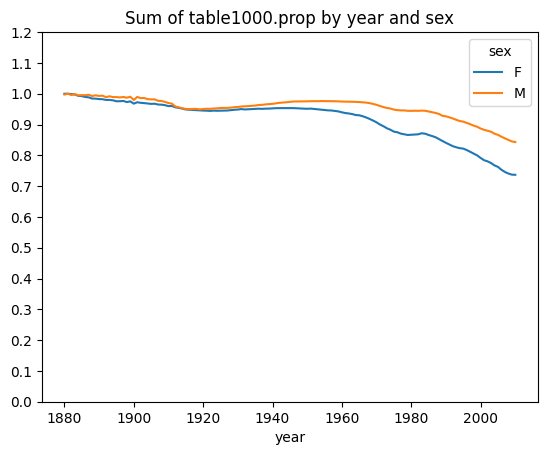

In [17]:
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)

table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13))

- Tại đây, các tên thông dụng trong top1000 có xu hướng giảm theo năm, tức là độ đa dạng về đặt tên cũng tăng theo từng năm.

**Tổng hợp tên các bé trai trong năm 2010**

In [18]:
# boy names from 2010
df = boys[boys["year"] == 2010]

df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102
261873,Camilo,M,194,2010,0.000102
261874,Bailey,M,194,2010,0.000102
261875,Destin,M,194,2010,0.000102


**Số lượng tên thông dụng đạt đến 50%**

In [19]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

prop_cumsum[:10]

,prop
260877,0.011523
260878,0.020934
260879,0.029959
260880,0.038930
260881,0.047817
260882,0.056579
260883,0.065155
260884,0.073414
260885,0.081528
260886,0.089621


In [20]:
prop_cumsum.values.searchsorted(0.5)

np.int64(116)

- So với năm 1900, số tên thông dụng đạt 50% có số lượng ít hơn

In [21]:
df = boys[boys["year"] == 1900]

in1900 = df.sort_values("prop", ascending=False).prop.cumsum()

in1900.searchsorted(0.5) + 1 # adding 1 to achieve proper value

np.int64(25)

**Áp dụng vào phân tích từng nhóm năm/giới tính**

In [22]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by="prop", ascending=False)
  return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

/tmp/ipython-input-1010965100.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


In [23]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

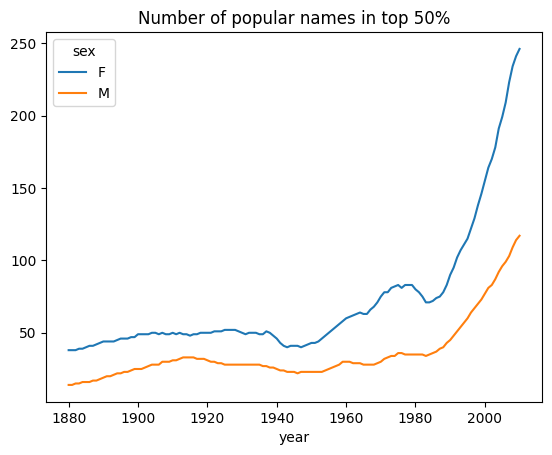

In [25]:
# result DataFrame
diversity.plot(title="Number of popular names in top 50%")

- -> Độ đa dạng về tên của các bé nữ thường cao hơn so với bé trai, và xu hướng tăng theo năm

**Thay đổi ký tự cuối**

Lời dẫn: Nhà nghiên cứu Laura Wattenberg đã chỉ ra rằng sự phân bố của tên các bé trai theo chữ cái cuối cùng đã thay đổi đáng kể trong vòng 100 năm.

**Tổng hợp ngày sinh của bộ dữ liệu, nhóm bởi năm/giới tính/ký tự cuối**

In [26]:
def get_last_letter(x):
  return x[-1]

last_letters = names["name"].map(get_last_letter)

last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

/tmp/ipython-input-2670626048.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)


In [27]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")

subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

**Chuẩn hóa bảng với tổng số ngày sinh, tạo bảng mới bao gồm bộ tổng các ngày sinh theo từng giới tính và mỗi ký tự**

In [28]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [29]:
letter_prop = subtable / subtable.sum()

letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

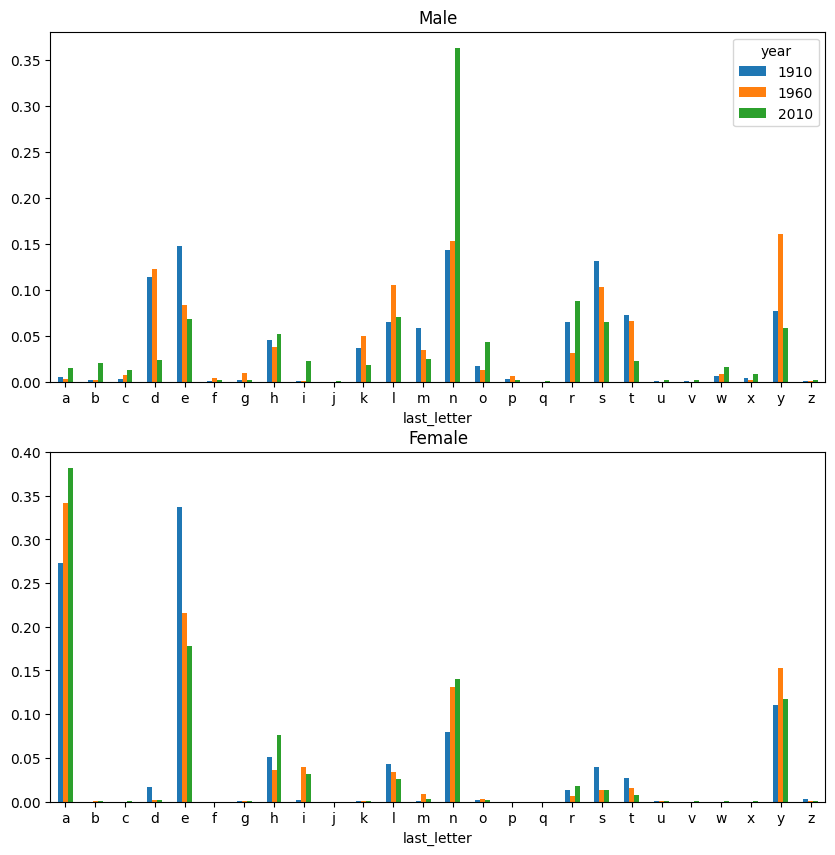

In [34]:
import matplotlib.pyplot as plt
# bar plots for each sex, seprate by year

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

- -> Tại biểu đồ, ta thấy được tên bé trai kết thúc bằng "n" đã gia tăng đáng kể từ những năm 1960.

**Chuẩn hóa bộ dữ liệu với năm và giới tính, chọn bộ phụ bởi ký tự cho các tên bé trai**

In [35]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T

dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


**Xu hướng đặt tên theo thời gian**

<Axes: xlabel='year'>

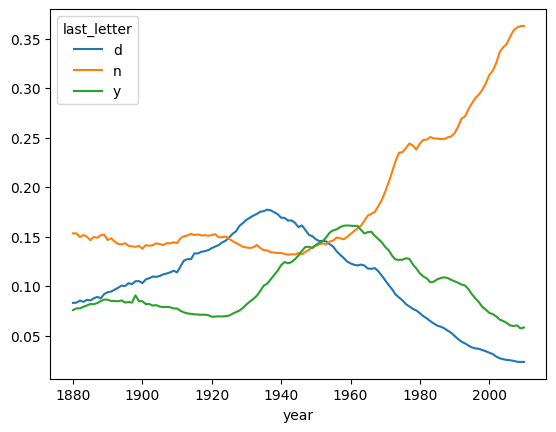

In [36]:
dny_ts.plot()